In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import gensim
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Data Understanding and Data Preparation

In [ ]:
df = pd.read_csv("/content/mobil_listrik.csv")

In [ ]:
df

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio insya alloh laris manis,positif
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinaikin usaha gitu cari cuan subsidi sebab inflasi pal...,negatif
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor motor pabrikan jepang,positif
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya rumah blom jd umkm bukan serta kur dapet ngaco sia d...,negatif
...,...,...,...,...,...
1512,UgxJPeJSdLI9a7L_adx4AaABAg,Fish aquspace,2022-09-19 12:30:44+00:00,apa kabar padahal negri luar biasa dapat negara,negatif
1513,UgyHzUNyXtjxftnySNF4AaABAg,Elias Panai,2022-09-19 12:27:18+00:00,antar anak sekolah antar bantu pasar klw jauh klw jebak macet abis dorong pulang,negatif
1514,UgxbIAGGO6Jt50q6wT94AaABAg,Mikhanalont Horassss,2022-09-19 12:23:06+00:00,esemka bangga solo,positif
1515,UgyRNiIV6k2t21V4iMN4AaABAg,ANI ANI SOFIE,2022-09-19 11:48:39+00:00,cerdas orang hny dn pasar itu jln x blom da gimana kota ngecas jam br harga nih bbm naikin,netral


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_komentar    1517 non-null   object
 1   nama_akun      1516 non-null   object
 2   tanggal        1517 non-null   object
 3   text_cleaning  1515 non-null   object
 4   sentimen       1517 non-null   object
dtypes: object(5)
memory usage: 59.4+ KB


In [ ]:
df['tanggal'] = pd.to_datetime(df['tanggal'], utc=True, infer_datetime_format=True)

<ipython-input-13-e1cf7c88b128>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['tanggal'] = pd.to_datetime(df['tanggal'], utc=True, infer_datetime_format=True)


<Axes: xlabel='sentimen', ylabel='count'>

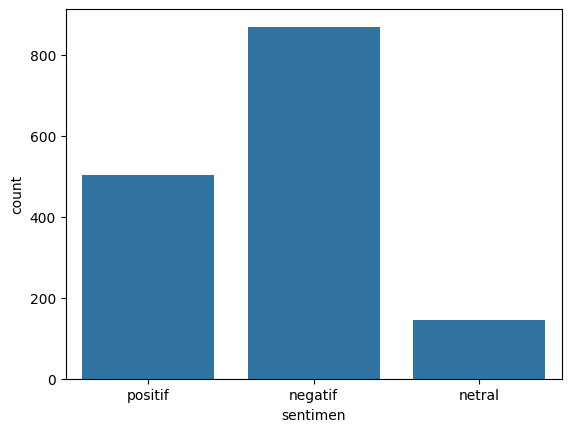

In [ ]:
sns.countplot(x = 'sentimen', data = df)

In [ ]:
# encode sentimen
def encode(sentimen_type):
  encoding = {'positif' : 1, 'negatif' : 0, 'netral': 2}
  return [encoding[text] for text in sentimen_type]

df['sentimen_type'] = encode(df['sentimen'])
df.head(10)

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen,sentimen_type
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio insya alloh laris manis,positif,1
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinaikin usaha gitu cari cuan subsidi sebab inflasi pal...,negatif,0
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor motor pabrikan jepang,positif,1
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif,0
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya rumah blom jd umkm bukan serta kur dapet ngaco sia d...,negatif,0
5,Ugx-zVY4ktd7JNUB6xV4AaABAg,Syarif Airlangga,2023-08-04 06:58:17+00:00,harga motor mahal masa harga mirip motor beat kualitas bagai langit bumi,positif,1
6,Ugzu5Wkjya394dPHoq14AaABAg,BajuMax,2023-08-04 06:31:56+00:00,mol keren yah berita plus padahal mol lokal merk batrenya juta garansi tahun anggap batre ...,negatif,0
7,Ugyy3luBOOHQspWyBiR4AaABAg,Putut Parwoto,2023-08-04 01:04:18+00:00,proses kenal produk baru butuh waktu ganti kendara bbm jadi kendara butuh waktu tehnologi baru s...,negatif,0
8,Ugw-fxD-u_9LFxhiRTp4AaABAg,Heru Prasetyo,2023-08-03 23:56:55+00:00,subsidi tepat sasar,netral,2
9,Ugx2k37YO1fch9eEM4d4AaABAg,jonan kick ass hole,2023-08-03 11:25:57+00:00,adil rata terima subsidi jangan jangan pajak pph msh subsidi perintah khianat pancasila sila lim...,negatif,0


In [ ]:
text_df = df[['text_cleaning', 'sentimen_type']]

In [ ]:
# Handle Duplicate and Missing Value
text_df = text_df.drop_duplicates(subset = 'text_cleaning', keep = 'first')
text_df.isnull().sum()

,0
text_cleaning,1
sentimen_type,0


In [ ]:
missingValue_row = text_df[text_df.isnull().any(axis=1)]
missingValue_row

,text_cleaning,sentimen_type
1422,NaN,2


In [ ]:
text_df = text_df.dropna()

In [ ]:
#Panjang dari komentar
text_df['len'] = text_df['text_cleaning'].apply(len)
text_df.head(10)

,text_cleaning,sentimen_type,len
0,saran sih bikin harga ionic sama kayak brio insya alloh laris manis,1,69
1,problem subsidi kualitas diturunin harga dinaikin usaha gitu cari cuan subsidi sebab inflasi pal...,0,104
2,baik kualitas kembang dulu baik kualitas motor motor pabrikan jepang,1,68
3,model jelek kwalitas buruk harga mahal croot,0,44
4,syarat ngaco woy anak muda blom punya rumah blom jd umkm bukan serta kur dapet ngaco sia d...,0,145
5,harga motor mahal masa harga mirip motor beat kualitas bagai langit bumi,1,72
6,mol keren yah berita plus padahal mol lokal merk batrenya juta garansi tahun anggap batre ...,0,421
7,proses kenal produk baru butuh waktu ganti kendara bbm jadi kendara butuh waktu tehnologi baru s...,0,100
8,subsidi tepat sasar,2,21
9,adil rata terima subsidi jangan jangan pajak pph msh subsidi perintah khianat pancasila sila lim...,0,358


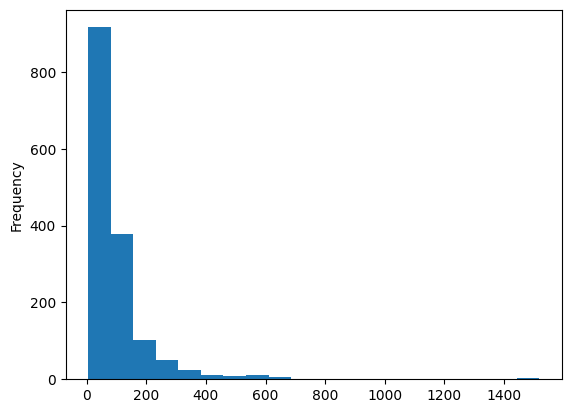

In [ ]:
tweet_length = text_df.len.plot(bins = 20, kind = 'hist')

In [ ]:
text_df.groupby('sentimen_type').describe()

len                                                         
               count        mean         std  min   25%   50%     75%     max
sentimen_type                                                                
0              869.0  117.637514  147.689279  9.0  42.0  75.0  129.00  1513.0
1              503.0   80.753479   95.919532  5.0  35.0  57.0   96.00  1518.0
2              142.0   56.584507   76.900621  6.0  21.0  34.5   66.75   570.0

# Text Prepocessing


In [ ]:
#Menghapus mention
def remove_pattern(text, pattern_regex):
  r = re.findall(pattern_regex, text)
  for i in r:
    text = re.sub(i,"",text)
  return text

text_df["text_clean"] = np.vectorize(remove_pattern)(text_df["text_cleaning"]," *RT* | *@[\w]*" )
text_df.sample(10)

,text_cleaning,sentimen_type,len,text_clean
822,seperti jelas butuh masyarakat indonesia akses transportasi publik rata,0,71,seperti jelas butuh masyarakat indonesia akses transportasi publik rata
1147,okay versi awal yah tau depan orang indo kn sabar isi bensin ful tank jalan ngecas l...,0,293,okay versi awal yah tau depan orang indo kn sabar isi bensin ful tank jalan ngecas l...
930,contoh luar negeri harga jt negara harga naik x lipat banyak koruptor negara,1,76,contoh luar negeri harga jt negara harga naik x lipat banyak koruptor negara
1145,nyata subsidi orang kaya lebih banyak orang miskin,0,50,nyata subsidi orang kaya lebih banyak orang miskin
230,subsidi trik marketing,2,22,subsidi trik marketing
621,puyeng muldoko luhut main utama indonesia,0,45,puyeng muldoko luhut main utama indonesia
231,teknologi baru familier teknologi bahan bakar tarik konsumen lebih cepat isi,0,76,teknologi baru familier teknologi bahan bakar tarik konsumen lebih cepat isi
715,bukan laku gaji indonesia butuh tahun mendapatkanya beda gaji luar negeri pandang keringat jerih...,0,149,bukan laku gaji indonesia butuh tahun mendapatkanya beda gaji luar negeri pandang keringat jerih...
1382,pinter banget perintah kirain cuma cuma nyata mancing pabrik mol indonesia,1,74,pinter banget perintah kirain cuma cuma nyata mancing pabrik mol indonesia
361,karna tempat isi bahan bakar sangat sulit mahal,0,47,karna tempat isi bahan bakar sangat sulit mahal


In [ ]:
# Menghapus unecessary words
def data_processing(text):
    text = text.lower()
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Menghapus URL
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^\w\s]','', text)
    text = re.sub('[^0-9a-zA-Z]+', ' ', text)
    text = re.sub(r'#', '', text)
    return text

text_df["text_clean"] = text_df['text_clean'].apply(data_processing)
text_df.sample(10)

,text_cleaning,sentimen_type,len,text_clean
399,bagaimana laku lebih cuma irit irit sangat giur kaum ekonomi bawah ironis kendara hargae atas jt...,0,213,bagaimana laku lebih cuma irit irit sangat giur kaum ekonomi bawah ironis kendara hargae atas jt...
317,model kurang tarik isi daya ribet lama,0,42,model kurang tarik isi daya ribet lama
809,masyarakat sensi wuling cino,0,28,masyarakat sensi wuling cino
726,tanya tanya kepala staf presiden ngurusin tonton video milik dealer kendara siapa paham,1,89,tanya tanya kepala staf presiden ngurusin tonton video milik dealer kendara siapa paham
943,kendara dinas perintah pake bensin ditawarin pke ganti aki ogah an kendara bensin akalin dlu...,0,110,kendara dinas perintah pake bensin ditawarin pke ganti aki ogah an kendara bensin akalin dlu l a...
1059,harga mahal stasiun isi sedikit baik sulit perlu teknisi khusus banyak banyak ngeluh rakyat suli...,1,189,harga mahal stasiun isi sedikit baik sulit perlu teknisi khusus banyak banyak ngeluh rakyat suli...
1326,mungkin dimodif mio mber,0,24,mungkin dimodif mio mber
592,tempat charger ev batas kota besar harga ev cenderung lebih mahal lcgc masyarakat lebih tarik be...,1,211,tempat charger ev batas kota besar harga ev cenderung lebih mahal lcgc masyarakat lebih tarik be...
1451,atur mbulet,2,11,atur mbulet
26,contohin dulu semua menteri dpr mpr guna listri,0,47,contohin dulu semua menteri dpr mpr guna listri


**Tokenizing**

In [ ]:
text_df['tokenized_text'] = text_df['text_clean'].apply(lambda x: x.split())
text_df.sample(10)

,text_cleaning,sentimen_type,len,text_clean,tokenized_text
1039,jare subsidi nyatane kakean s pura subsidi,2,44,jare subsidi nyatane kakean s pura subsidi,"[jare, subsidi, nyatane, kakean, s, pura, subsidi]"
54,harga jual mahal banding kendara biasa gimana masyarakat mau beli,1,67,harga jual mahal banding kendara biasa gimana masyarakat mau beli,"[harga, jual, mahal, banding, kendara, biasa, gimana, masyarakat, mau, beli]"
1137,chaging station banyak perintah turun pajak,0,43,chaging station banyak perintah turun pajak,"[chaging, station, banyak, perintah, turun, pajak]"
748,bingung ngecasnya bos,1,21,bingung ngecasnya bos,"[bingung, ngecasnya, bos]"
595,mahal dikit pilih charging station dikit indonesia apartemen baik deh penting,0,81,mahal dikit pilih charging station dikit indonesia apartemen baik deh penting,"[mahal, dikit, pilih, charging, station, dikit, indonesia, apartemen, baik, deh, penting]"
1395,subsidi kurang tepat,0,24,subsidi kurang tepat,"[subsidi, kurang, tepat]"
1287,mau bahan uji coba tunggu dulu tahun an mungkin baterai ukur powerbank lebih murah ingat...,1,299,mau bahan uji coba tunggu dulu tahun an mungkin baterai ukur powerbank lebih murah ingat kendar...,"[mau, bahan, uji, coba, tunggu, dulu, tahun, an, mungkin, baterai, ukur, powerbank, lebih, murah..."
600,sulit si aplgi tingal kota kecil lebih tarik hybrid krna msih mengunakan bbm beli dmna ket...,0,138,sulit si aplgi tingal kota kecil lebih tarik hybrid krna msih mengunakan bbm beli dmna ketimbng ...,"[sulit, si, aplgi, tingal, kota, kecil, lebih, tarik, hybrid, krna, msih, mengunakan, bbm, beli,..."
556,model kurang masuk selera turut,0,35,model kurang masuk selera turut,"[model, kurang, masuk, selera, turut]"
932,coba jabat dluan mmberi contoh mungkin lebih mudah sosialisasi depan dorong masyarakat tpi jab...,0,114,coba jabat dluan mmberi contoh mungkin lebih mudah sosialisasi depan dorong masyarakat tpi jabat...,"[coba, jabat, dluan, mmberi, contoh, mungkin, lebih, mudah, sosialisasi, depan, dorong, masyarak..."


**Filtering**

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.7 MB/s eta 0:00:00


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

In [ ]:
def stopwords_text(tokens):
  clened_tokens = []
  for token in tokens:
      if token not in stopwords:
          clened_tokens.append(token)
  return clened_tokens

text_df['stop'] = text_df['tokenized_text'].apply(stopwords_text)
text_df.sample(10)

,text_cleaning,sentimen_type,len,text_clean,tokenized_text,stop
1063,sarpras coba jabat aparatur perintah wajib guna dorong lebih cepat sarpras moda negara,0,86,sarpras coba jabat aparatur perintah wajib guna dorong lebih cepat sarpras moda negara,"[sarpras, coba, jabat, aparatur, perintah, wajib, guna, dorong, lebih, cepat, sarpras, moda, neg...","[sarpras, coba, jabat, aparatur, perintah, wajib, dorong, lebih, cepat, sarpras, moda, negara]"
687,anak anak,0,9,anak anak,"[anak, anak]","[anak, anak]"
72,bukan laku mahal,0,18,bukan laku mahal,"[bukan, laku, mahal]","[bukan, laku, mahal]"
1215,infrastruktur siap main launching,1,35,infrastruktur siap main launching,"[infrastruktur, siap, main, launching]","[infrastruktur, siap, main, launching]"
1001,kesi baterai sebar layak pom bensin,0,37,kesi baterai sebar layak pom bensin,"[kesi, baterai, sebar, layak, pom, bensin]","[kesi, baterai, sebar, layak, pom, bensin]"
1009,ngomong mau begal partai,0,24,ngomong mau begal partai,"[ngomong, mau, begal, partai]","[ngomong, mau, begal, partai]"
635,orang orang mending beli sepeda rental bocah jauh lebih untung,0,68,orang orang mending beli sepeda rental bocah jauh lebih untung,"[orang, orang, mending, beli, sepeda, rental, bocah, jauh, lebih, untung]","[orang, orang, mending, beli, sepeda, rental, bocah, jauh, lebih, untung]"
79,masyarakat tengah bawah mikir sih beli biaya rumah berapa sanggup ampere rumah masa iya pas ...,0,373,masyarakat tengah bawah mikir sih beli biaya rumah berapa sanggup ampere rumah masa iya pas char...,"[masyarakat, tengah, bawah, mikir, sih, beli, biaya, rumah, berapa, sanggup, ampere, rumah, masa...","[masyarakat, tengah, bawah, mikir, sih, beli, biaya, rumah, berapa, sanggup, ampere, rumah, masa..."
1349,mau beli tarif udh naikin dulu trus lowbat apa tiap daerah udh buat charger,1,77,mau beli tarif udh naikin dulu trus lowbat apa tiap daerah udh buat charger,"[mau, beli, tarif, udh, naikin, dulu, trus, lowbat, apa, tiap, daerah, udh, buat, charger]","[mau, beli, tarif, udh, naikin, dulu, trus, lowbat, apa, tiap, daerah, udh, buat, charger]"
698,cocok buat desa jala tanah batu,1,35,cocok buat desa jala tanah batu,"[cocok, buat, desa, jala, tanah, batu]","[cocok, buat, desa, jala, tanah, batu]"


In [ ]:
import nltk

!mkdir data
!wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/main/data/slang.txt
!wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/main/data/stopwords_id.txt
!wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/3bdb2e8f919892f76eb53e23c504888a396cd9cc/data/kata_dasar.txt
!wget -P data/ https://github.com/taudataanalytics/taudata-Academy/blob/main/data/corpus_sederhana.txt
!wget -P / https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/3bdb2e8f919892f76eb53e23c504888a396cd9cc/taudataNlpTm.py
!pip install unidecode textblob sastrawi
nltk.download('popular')

--2024-09-02 15:35:08--  https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/main/data/slang.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29041 (28K) [text/plain]
Saving to: ‘data/slang.txt’

slang.txt           100%[===================>]  28.36K  --.-KB/s    in 0.003s  

2024-09-02 15:35:08 (10.5 MB/s) - ‘data/slang.txt’ saved [29041/29041]

--2024-09-02 15:35:08--  https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/main/data/stopwords_id.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

**Replace Slang**

In [ ]:
# Loading Slang dan Singkatan dari File
df=open('data/slang.txt',"r",encoding="utf-8", errors='replace')
slangS = df.readlines(); df.close()
slangS[:5]

['& : dan\n',
 '1pun : satupun\n',
 '7an : tujuan\n',
 '@ : di\n',
 'Dr : dokter\n']

In [ ]:
slangS = [t.strip('\n').strip() for t in slangS]
print(slangS[:5])

['& : dan', '1pun : satupun', '7an : tujuan', '@ : di', 'Dr : dokter']


In [ ]:
# pisahkan berdasarkan ':'
slangS = [t.split(":") for t in slangS]
slangS = [[k.strip(), v.strip()] for k,v in slangS]
print(slangS[:3])
slangS = {k:v for k,v in slangS}
print(slangS['7an'])

[['&', 'dan'], ['1pun', 'satupun'], ['7an', 'tujuan']]
tujuan


In [ ]:
def replace_slang(text):
  """Replaces slang words in a given text."""
  if isinstance(text, list):
    return [' '.join([slangS.get(word, word) for word in sentence.split()]) for sentence in text]
  else:
    T = text.split()
    for i,t in enumerate(T):
        if t in slangS.keys():
            T[i] = slangS[t]
    return ' '.join(T)

text_df['stop'] = text_df['stop'].apply(replace_slang)
text_df.head(10)

,text_cleaning,sentimen_type,len,text_clean,tokenized_text,stop
0,saran sih bikin harga ionic sama kayak brio insya alloh laris manis,1,69,saran sih bikin harga ionic sama kayak brio insya alloh laris manis,"[saran, sih, bikin, harga, ionic, sama, kayak, brio, insya, alloh, laris, manis]","[saran, sih, bikin, harga, ionic, sama, kayak, brio, insya, alloh, laris, manis]"
1,problem subsidi kualitas diturunin harga dinaikin usaha gitu cari cuan subsidi sebab inflasi pal...,0,104,problem subsidi kualitas diturunin harga dinaikin usaha gitu cari cuan subsidi sebab inflasi pal...,"[problem, subsidi, kualitas, diturunin, harga, dinaikin, usaha, gitu, cari, cuan, subsidi, sebab...","[masalah, subsidi, kualitas, diturunin, harga, dinaikin, usaha, begitu, cari, cuan, subsidi, inf..."
2,baik kualitas kembang dulu baik kualitas motor motor pabrikan jepang,1,68,baik kualitas kembang dulu baik kualitas motor motor pabrikan jepang,"[baik, kualitas, kembang, dulu, baik, kualitas, motor, motor, pabrikan, jepang]","[baik, kualitas, kembang, dahulu, baik, kualitas, motor, motor, pabrikan, jepang]"
3,model jelek kwalitas buruk harga mahal croot,0,44,model jelek kwalitas buruk harga mahal croot,"[model, jelek, kwalitas, buruk, harga, mahal, croot]","[model, jelek, kwalitas, buruk, harga, mahal, croot]"
4,syarat ngaco woy anak muda blom punya rumah blom jd umkm bukan serta kur dapet ngaco sia d...,0,145,syarat ngaco woy anak muda blom punya rumah blom jd umkm bukan serta kur dapet ngaco sia deui si...,"[syarat, ngaco, woy, anak, muda, blom, punya, rumah, blom, jd, umkm, bukan, serta, kur, dapet, n...","[syarat, ngaco, woy, anak, muda, blom, punya, rumah, blom, jadi, umkm, bukan, kur, dapat, ngaco,..."
5,harga motor mahal masa harga mirip motor beat kualitas bagai langit bumi,1,72,harga motor mahal masa harga mirip motor beat kualitas bagai langit bumi,"[harga, motor, mahal, masa, harga, mirip, motor, beat, kualitas, bagai, langit, bumi]","[harga, motor, mahal, masa, harga, mirip, motor, beat, kualitas, bagai, langit, bumi]"
6,mol keren yah berita plus padahal mol lokal merk batrenya juta garansi tahun anggap batre ...,0,421,mol keren yah berita plus padahal mol lokal merk batrenya juta garansi tahun anggap batre awet t...,"[mol, keren, yah, berita, plus, padahal, mol, lokal, merk, batrenya, juta, garansi, tahun, angga...","[mol, keren, yah, berita, plus, padahal, mol, lokal, merk, batrenya, juta, garansi, tahun, angga..."
7,proses kenal produk baru butuh waktu ganti kendara bbm jadi kendara butuh waktu tehnologi baru s...,0,100,proses kenal produk baru butuh waktu ganti kendara bbm jadi kendara butuh waktu tehnologi baru s...,"[proses, kenal, produk, baru, butuh, waktu, ganti, kendara, bbm, jadi, kendara, butuh, waktu, te...","[proses, kenal, produk, baru, butuh, waktu, ganti, kendara, bbm, jadi, kendara, butuh, waktu, te..."
8,subsidi tepat sasar,2,21,subsidi tepat sasar,"[subsidi, tepat, sasar]","[subsidi, tepat, sasar]"
9,adil rata terima subsidi jangan jangan pajak pph msh subsidi perintah khianat pancasila sila lim...,0,358,adil rata terima subsidi jangan jangan pajak pph msh subsidi perintah khianat pancasila sila lim...,"[adil, rata, terima, subsidi, jangan, jangan, pajak, pph, msh, subsidi, perintah, khianat, panca...","[adil, rata, terima, subsidi, jangan, jangan, pajak, pph, masih, subsidi, perintah, khianat, pan..."


**Replace Typo**

In [ ]:
import taudataNlpTm as tau

def correct_tokens(tokens):
    corrected_tokens = [tau.correction(token) for token in tokens]
    return corrected_tokens

text_df['corrected_text'] = text_df['stop'].apply(correct_tokens)

In [ ]:
text_df.head(10)

,text_cleaning,sentimen_type,len,text_clean,tokenized_text,stop,corrected_text
0,saran sih bikin harga ionic sama kayak brio insya alloh laris manis,1,69,saran sih bikin harga ionic sama kayak brio insya alloh laris manis,"[saran, sih, bikin, harga, ionic, sama, kayak, brio, insya, alloh, laris, manis]","[saran, sih, bikin, harga, ionic, sama, kayak, brio, insya, alloh, laris, manis]","[saran, sih, bikin, harga, sonik, sama, kayak, krio, insya, allah, laris, manis]"
1,problem subsidi kualitas diturunin harga dinaikin usaha gitu cari cuan subsidi sebab inflasi pal...,0,104,problem subsidi kualitas diturunin harga dinaikin usaha gitu cari cuan subsidi sebab inflasi pal...,"[problem, subsidi, kualitas, diturunin, harga, dinaikin, usaha, gitu, cari, cuan, subsidi, sebab...","[masalah, subsidi, kualitas, diturunin, harga, dinaikin, usaha, begitu, cari, cuan, subsidi, inf...","[masalah, subsidi, kualitas, diturunin, harga, dinaikin, usaha, begitu, cari, tuan, subsidi, inf..."
2,baik kualitas kembang dulu baik kualitas motor motor pabrikan jepang,1,68,baik kualitas kembang dulu baik kualitas motor motor pabrikan jepang,"[baik, kualitas, kembang, dulu, baik, kualitas, motor, motor, pabrikan, jepang]","[baik, kualitas, kembang, dahulu, baik, kualitas, motor, motor, pabrikan, jepang]","[baik, kualitas, kembang, dahulu, baik, kualitas, motor, motor, pabrikan, kepang]"
3,model jelek kwalitas buruk harga mahal croot,0,44,model jelek kwalitas buruk harga mahal croot,"[model, jelek, kwalitas, buruk, harga, mahal, croot]","[model, jelek, kwalitas, buruk, harga, mahal, croot]","[model, jelek, kualitas, buruk, harga, mahal, corot]"
4,syarat ngaco woy anak muda blom punya rumah blom jd umkm bukan serta kur dapet ngaco sia d...,0,145,syarat ngaco woy anak muda blom punya rumah blom jd umkm bukan serta kur dapet ngaco sia deui si...,"[syarat, ngaco, woy, anak, muda, blom, punya, rumah, blom, jd, umkm, bukan, serta, kur, dapet, n...","[syarat, ngaco, woy, anak, muda, blom, punya, rumah, blom, jadi, umkm, bukan, kur, dapat, ngaco,...","[syarat, gaco, won, anak, muda, bom, punya, rumah, bom, jadi, umum, bukan, kur, dapat, gaco, sia..."
5,harga motor mahal masa harga mirip motor beat kualitas bagai langit bumi,1,72,harga motor mahal masa harga mirip motor beat kualitas bagai langit bumi,"[harga, motor, mahal, masa, harga, mirip, motor, beat, kualitas, bagai, langit, bumi]","[harga, motor, mahal, masa, harga, mirip, motor, beat, kualitas, bagai, langit, bumi]","[harga, motor, mahal, masa, harga, mirip, motor, berat, kualitas, bagai, langit, bumi]"
6,mol keren yah berita plus padahal mol lokal merk batrenya juta garansi tahun anggap batre ...,0,421,mol keren yah berita plus padahal mol lokal merk batrenya juta garansi tahun anggap batre awet t...,"[mol, keren, yah, berita, plus, padahal, mol, lokal, merk, batrenya, juta, garansi, tahun, angga...","[mol, keren, yah, berita, plus, padahal, mol, lokal, merk, batrenya, juta, garansi, tahun, angga...","[mol, keren, bah, berita, plus, padahal, mol, lokal, mark, batrenya, juta, garansi, tahun, angga..."
7,proses kenal produk baru butuh waktu ganti kendara bbm jadi kendara butuh waktu tehnologi baru s...,0,100,proses kenal produk baru butuh waktu ganti kendara bbm jadi kendara butuh waktu tehnologi baru s...,"[proses, kenal, produk, baru, butuh, waktu, ganti, kendara, bbm, jadi, kendara, butuh, waktu, te...","[proses, kenal, produk, baru, butuh, waktu, ganti, kendara, bbm, jadi, kendara, butuh, waktu, te...","[proses, kenal, produk, baru, butuh, waktu, ganti, kendara, bom, jadi, kendara, butuh, waktu, te..."
8,subsidi tepat sasar,2,21,subsidi tepat sasar,"[subsidi, tepat, sasar]","[subsidi, tepat, sasar]","[subsidi, tepat, sasar]"
9,adil rata terima subsidi jangan jangan pajak pph msh subsidi perintah khianat pancasila sila lim...,0,358,adil rata terima subsidi jangan jangan pajak pph msh subsidi perintah khianat pancasila sila lim...,"[adil, rata, terima, subsidi, jangan, jangan, pajak, pph, msh, subsidi, peri

In [ ]:
from unidecode import unidecode

def process_tokens(tokens):
    return [unidecode(token).lower() for token in tokens]
text_df['processed_text'] = text_df['stop'].apply(process_tokens)

**Stemming**

In [ ]:
#Import stemmerFactory yang terdapat pada sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

In [ ]:
def stemming_text(tokens):
  hasil = [stemmer.stem(token) for token in tokens]
  return hasil

text_df['stemmed'] = text_df['stop'].apply(stemming_text)
text_df.head()

,text_cleaning,sentimen_type,len,text_clean,tokenized_text,stop,corrected_text,processed_text,stemmed
0,saran sih bikin harga ionic sama kayak brio insya alloh laris manis,1,69,saran sih bikin harga ionic sama kayak brio insya alloh laris manis,"[saran, sih, bikin, harga, ionic, sama, kayak, brio, insya, alloh, laris, manis]","[saran, sih, bikin, harga, ionic, sama, kayak, brio, insya, alloh, laris, manis]","[saran, sih, bikin, harga, sonik, sama, kayak, krio, insya, allah, laris, manis]","[saran, sih, bikin, harga, ionic, sama, kayak, brio, insya, alloh, laris, manis]","[saran, sih, bikin, harga, ionic, sama, kayak, brio, insya, alloh, laris, manis]"
1,problem subsidi kualitas diturunin harga dinaikin usaha gitu cari cuan subsidi sebab inflasi pal...,0,104,problem subsidi kualitas diturunin harga dinaikin usaha gitu cari cuan subsidi sebab inflasi pal...,"[problem, subsidi, kualitas, diturunin, harga, dinaikin, usaha, gitu, cari, cuan, subsidi, sebab...","[masalah, subsidi, kualitas, diturunin, harga, dinaikin, usaha, begitu, cari, cuan, subsidi, inf...","[masalah, subsidi, kualitas, diturunin, harga, dinaikin, usaha, begitu, cari, tuan, subsidi, inf...","[masalah, subsidi, kualitas, diturunin, harga, dinaikin, usaha, begitu, cari, cuan, subsidi, inf...","[masalah, subsidi, kualitas, diturunin, harga, dinaikin, usaha, begitu, cari, cuan, subsidi, inf..."
2,baik kualitas kembang dulu baik kualitas motor motor pabrikan jepang,1,68,baik kualitas kembang dulu baik kualitas motor motor pabrikan jepang,"[baik, kualitas, kembang, dulu, baik, kualitas, motor, motor, pabrikan, jepang]","[baik, kualitas, kembang, dahulu, baik, kualitas, motor, motor, pabrikan, jepang]","[baik, kualitas, kembang, dahulu, baik, kualitas, motor, motor, pabrikan, kepang]","[baik, kualitas, kembang, dahulu, baik, kualitas, motor, motor, pabrikan, jepang]","[baik, kualitas, kembang, dahulu, baik, kualitas, motor, motor, pabrikan, jepang]"
3,model jelek kwalitas buruk harga mahal croot,0,44,model jelek kwalitas buruk harga mahal croot,"[model, jelek, kwalitas, buruk, harga, mahal, croot]","[model, jelek, kwalitas, buruk, harga, mahal, croot]","[model, jelek, kualitas, buruk, harga, mahal, corot]","[model, jelek, kwalitas, buruk, harga, mahal, croot]","[model, jelek, kwalitas, buruk, harga, mahal, croot]"
4,syarat ngaco woy anak muda blom punya rumah blom jd umkm bukan serta kur dapet ngaco sia d...,0,145,syarat ngaco woy anak muda blom punya rumah blom jd umkm bukan serta kur dapet ngaco sia deui si...,"[syarat, ngaco, woy, anak, muda, blom, punya, rumah, blom, jd, umkm, bukan, serta, kur, dapet, n...","[syarat, ngaco, woy, anak, muda, blom, punya, rumah, blom, jadi, umkm, bukan, kur, dapat, ngaco,...","[syarat, gaco, won, anak, muda, bom, punya, rumah, bom, jadi, umum, bukan, kur, dapat, gaco, sia...","[syarat, ngaco, woy, anak, muda, blom, punya, rumah, blom, jadi, umkm, bukan, kur, dapat, ngaco,...","[syarat, ngaco, woy, anak, muda, blom, punya, rumah, blom, jadi, umkm, bukan, kur, dapat, ngaco,..."


# Visualization

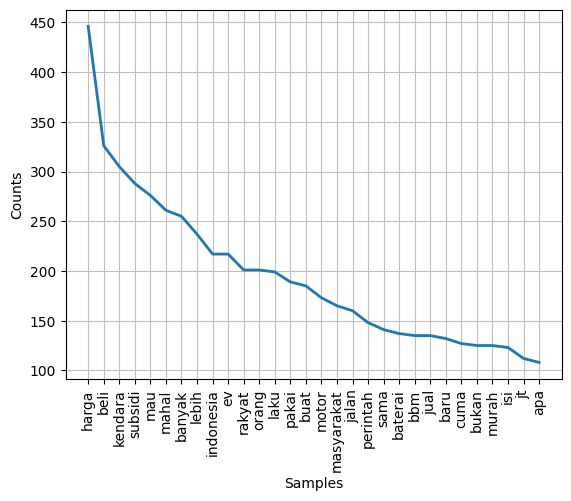

In [ ]:
from nltk.probability import FreqDist
all_tokens = [token for sublist in text_df['stemmed'] for token in sublist]
freq_dist = FreqDist(all_tokens)

freq_dist.plot(30,cumulative=False)
plt.show()

In [ ]:
def remove_punch(text):
  text = " ".join([char for char in text if char not in string.punctuation])
  return text
text_df["final_clean_text"] = text_df["stemmed"].apply(lambda x: remove_punch(x))
text_df.head(10)

,text_cleaning,sentimen_type,len,text_clean,tokenized_text,stop,corrected_text,processed_text,stemmed,final_clean_text
0,saran sih bikin harga ionic sama kayak brio insya alloh laris manis,1,69,saran sih bikin harga ionic sama kayak brio insya alloh laris manis,"[saran, sih, bikin, harga, ionic, sama, kayak, brio, insya, alloh, laris, manis]","[saran, sih, bikin, harga, ionic, sama, kayak, brio, insya, alloh, laris, manis]","[saran, sih, bikin, harga, sonik, sama, kayak, krio, insya, allah, laris, manis]","[saran, sih, bikin, harga, ionic, sama, kayak, brio, insya, alloh, laris, manis]","[saran, sih, bikin, harga, ionic, sama, kayak, brio, insya, alloh, laris, manis]",saran sih bikin harga ionic sama kayak brio insya alloh laris manis
1,problem subsidi kualitas diturunin harga dinaikin usaha gitu cari cuan subsidi sebab inflasi pal...,0,104,problem subsidi kualitas diturunin harga dinaikin usaha gitu cari cuan subsidi sebab inflasi pal...,"[problem, subsidi, kualitas, diturunin, harga, dinaikin, usaha, gitu, cari, cuan, subsidi, sebab...","[masalah, subsidi, kualitas, diturunin, harga, dinaikin, usaha, begitu, cari, cuan, subsidi, inf...","[masalah, subsidi, kualitas, diturunin, harga, dinaikin, usaha, begitu, cari, tuan, subsidi, inf...","[masalah, subsidi, kualitas, diturunin, harga, dinaikin, usaha, begitu, cari, cuan, subsidi, inf...","[masalah, subsidi, kualitas, diturunin, harga, dinaikin, usaha, begitu, cari, cuan, subsidi, inf...",masalah subsidi kualitas diturunin harga dinaikin usaha begitu cari cuan subsidi inflasi paling ...
2,baik kualitas kembang dulu baik kualitas motor motor pabrikan jepang,1,68,baik kualitas kembang dulu baik kualitas motor motor pabrikan jepang,"[baik, kualitas, kembang, dulu, baik, kualitas, motor, motor, pabrikan, jepang]","[baik, kualitas, kembang, dahulu, baik, kualitas, motor, motor, pabrikan, jepang]","[baik, kualitas, kembang, dahulu, baik, kualitas, motor, motor, pabrikan, kepang]","[baik, kualitas, kembang, dahulu, baik, kualitas, motor, motor, pabrikan, jepang]","[baik, kualitas, kembang, dahulu, baik, kualitas, motor, motor, pabrikan, jepang]",baik kualitas kembang dahulu baik kualitas motor motor pabrikan jepang
3,model jelek kwalitas buruk harga mahal croot,0,44,model jelek kwalitas buruk harga mahal croot,"[model, jelek, kwalitas, buruk, harga, mahal, croot]","[model, jelek, kwalitas, buruk, harga, mahal, croot]","[model, jelek, kualitas, buruk, harga, mahal, corot]","[model, jelek, kwalitas, buruk, harga, mahal, croot]","[model, jelek, kwalitas, buruk, harga, mahal, croot]",model jelek kwalitas buruk harga mahal croot
4,syarat ngaco woy anak muda blom punya rumah blom jd umkm bukan serta kur dapet ngaco sia d...,0,145,syarat ngaco woy anak muda blom punya rumah blom jd umkm bukan serta kur dapet ngaco sia deui si...,"[syarat, ngaco, woy, anak, muda, blom, punya, rumah, blom, jd, umkm, bukan, serta, kur, dapet, n...","[syarat, ngaco, woy, anak, muda, blom, punya, rumah, blom, jadi, umkm, bukan, kur, dapat, ngaco,...","[syarat, gaco, won, anak, muda, bom, punya, rumah, bom, jadi, umum, bukan, kur, dapat, gaco, sia...","[syarat, ngaco, woy, anak, muda, blom, punya, rumah, blom, jadi, umkm, bukan, kur, dapat, ngaco,...","[syarat, ngaco, woy, anak, muda, blom, punya, rumah, blom, jadi, umkm, bukan, kur, dapat, ngaco,...",syarat ngaco woy anak muda blom punya rumah blom jadi umkm bukan kur dapat ngaco sia deui sia de...
5,harga motor mahal masa harga mirip motor beat kualitas bagai langit bumi,1,72,harga motor mahal masa harga mirip motor beat kualitas bagai langit bumi,"[harga, motor, mahal, masa, harga, mirip, motor, beat, kualitas, bagai, langit, bumi]","[harga, motor, mahal, masa, harga, mirip, motor, beat, kualitas, bagai, langit, bumi]","[harga, motor, mahal, masa, harga, mirip, motor, berat, kualitas, bagai, langit, bumi]","[harga, motor, mahal, masa, harga, mirip, motor, beat, kualitas, bagai, langit, bumi]","[harga, motor, mahal, masa, harga, mirip, motor, beat, kualitas, ba

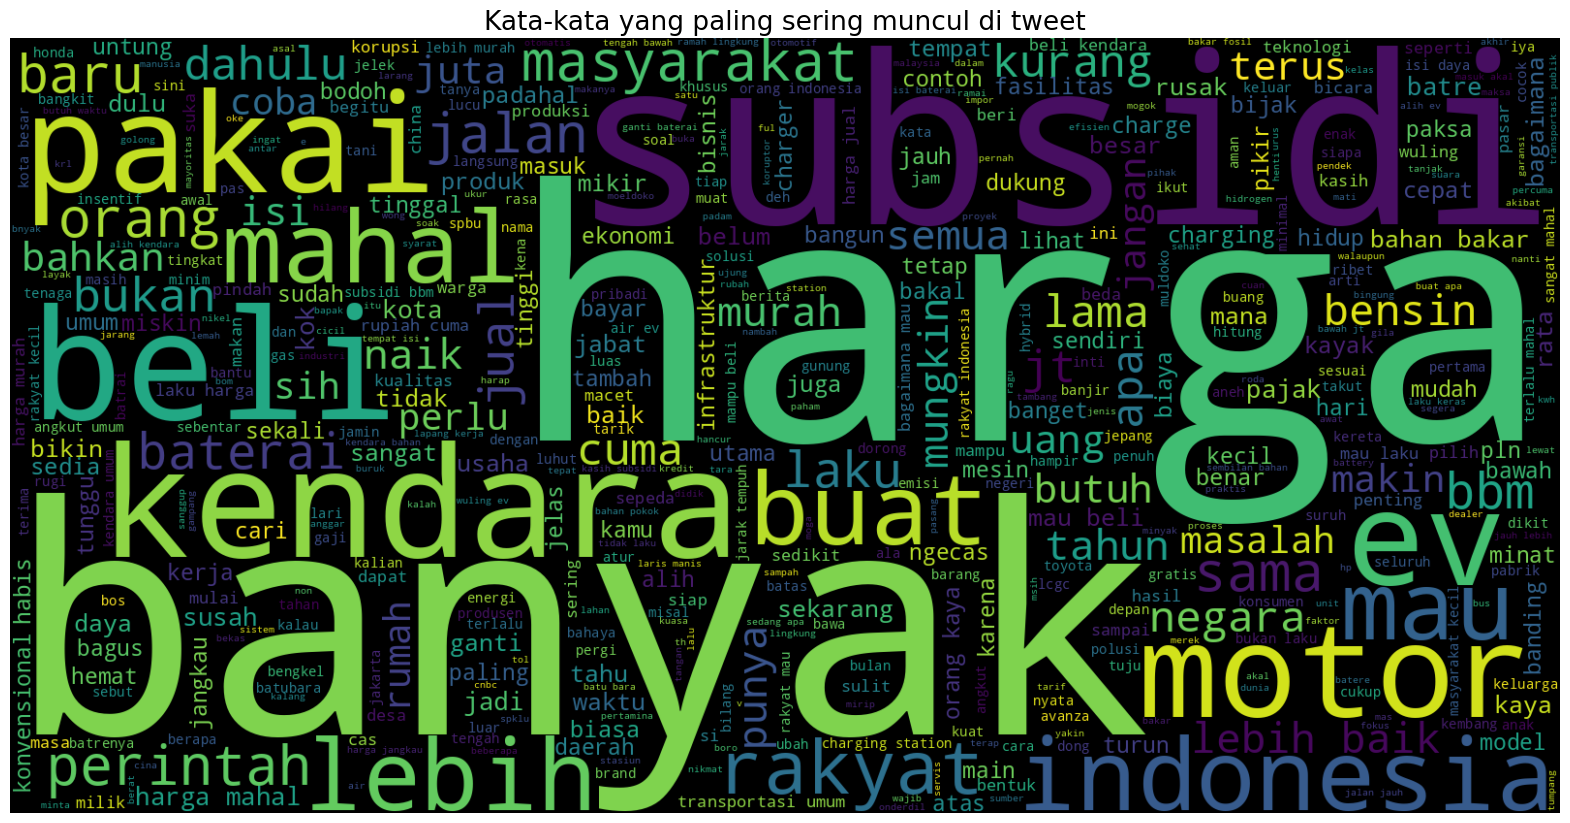

In [ ]:
text = ' '.join([word for word in text_df['final_clean_text'] if word])
if not text:
    print("The input text is empty. Please check your data processing steps.")
else:
    wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
    plt.figure(figsize=(20,15), facecolor='None')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
plt.title('Kata-kata yang paling sering muncul ', fontsize=19)
plt.show()

# Modelling

In [ ]:
# mempersiapkan semua library, untuk kali ini saya menggunakna sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

<Axes: xlabel='sentimen_type', ylabel='count'>

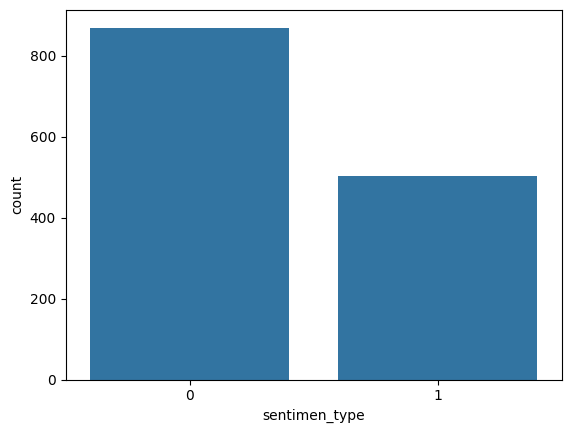

In [ ]:
#membuang nilai netral
text_df.drop(text_df.loc[text_df["sentimen_type"] == 2].index, inplace=True)
sns.countplot(x = 'sentimen_type', data = text_df)

In [ ]:
#Balancing Data
negative = len(text_df[text_df["sentimen_type"] == 1])
negative_indices = text_df[text_df["sentimen_type"] == 0].index

random_indices = np.random.choice(negative_indices,negative, replace=False)
positive_indices = text_df[text_df["sentimen_type"] == 1].index

under_sample_indices = np.concatenate([positive_indices,random_indices])
under_sample = text_df.loc[under_sample_indices]

In [ ]:
under_sample['sentimen_type'].value_counts()

,count
sentimen_type,
1,503
0,503


In [ ]:
X = under_sample.final_clean_text
y = under_sample.sentimen_type #kolom target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =12345)

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(2,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  9968


In [ ]:
#tranform data tweet menggunakan TF-IDF Vectorizer
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [ ]:
#fungsi yang digunakan untuk mengevaluasi model
def model_Evaluate(model):
  # nilai prediksi untuk data test
  y_pred = model.predict(X_test)
  # mencetak hasil evaluasi metriks dari dataset
  print(classification_report(y_test, y_pred))

  # menghitung dan menampilkan hasil dari Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       106
           1       0.48      1.00      0.64        96

    accuracy                           0.48       202
   macro avg       0.24      0.50      0.32       202
weighted avg       0.23      0.48      0.31       202



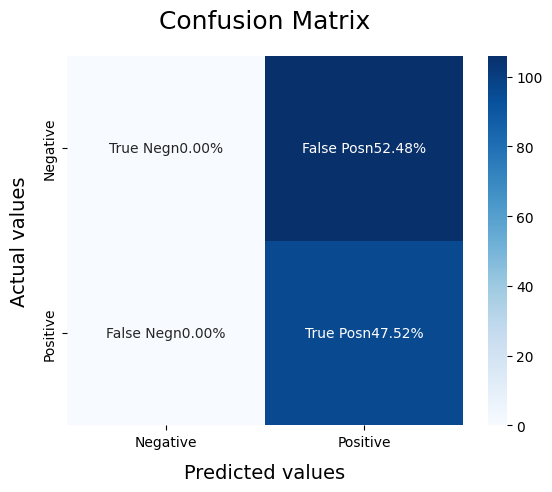

In [ ]:
# model Bernoulli Naive Bayes Classifier
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

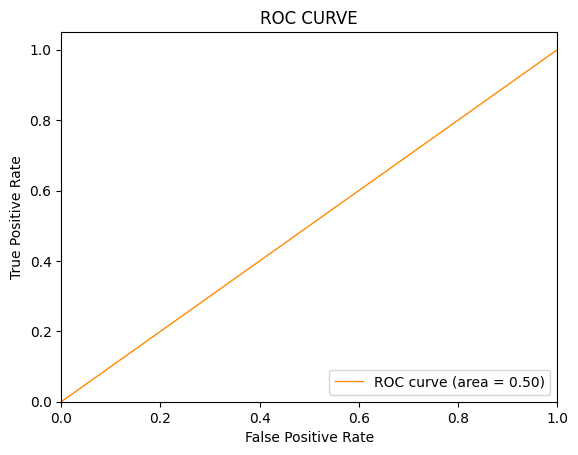

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1) # tingkat true Positive Rate (TPR) dan tingkat False Positive Rate (FPR)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       106
           1       0.67      0.49      0.57        96

    accuracy                           0.64       202
   macro avg       0.65      0.64      0.63       202
weighted avg       0.65      0.64      0.64       202



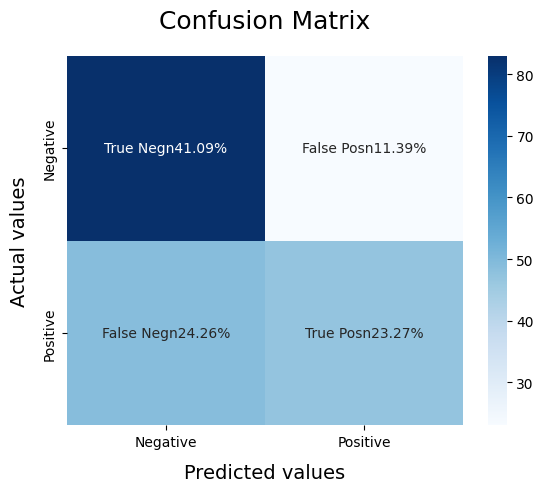

In [ ]:
# model SVM (Support Vector Machine)
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

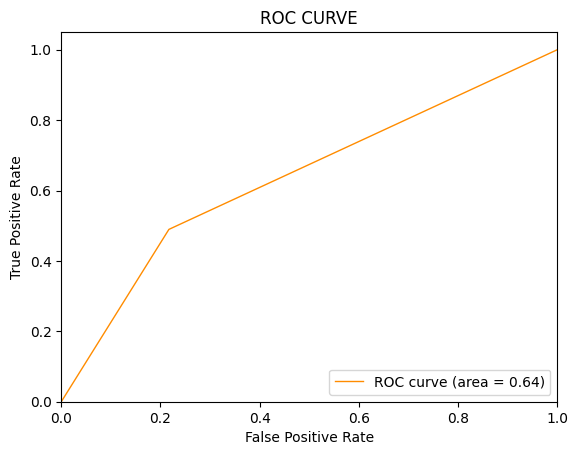

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.64      0.77      0.70       106
           1       0.67      0.51      0.58        96

    accuracy                           0.65       202
   macro avg       0.65      0.64      0.64       202
weighted avg       0.65      0.65      0.64       202



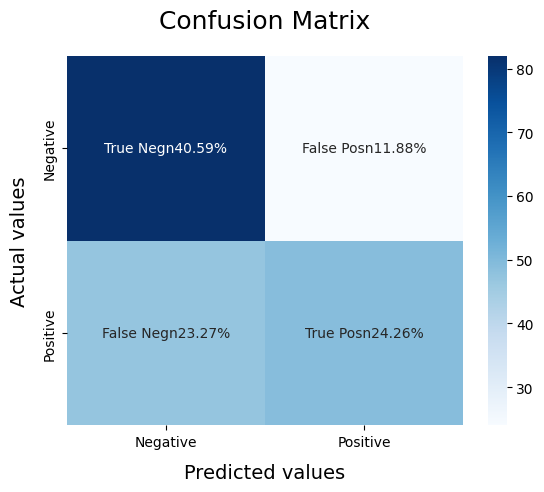

In [ ]:
# model logistik regression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

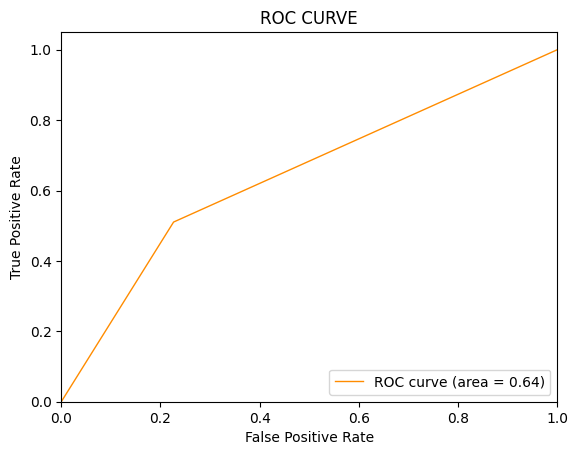

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.71      0.21      0.32       106
           1       0.51      0.91      0.65        96

    accuracy                           0.54       202
   macro avg       0.61      0.56      0.49       202
weighted avg       0.61      0.54      0.48       202



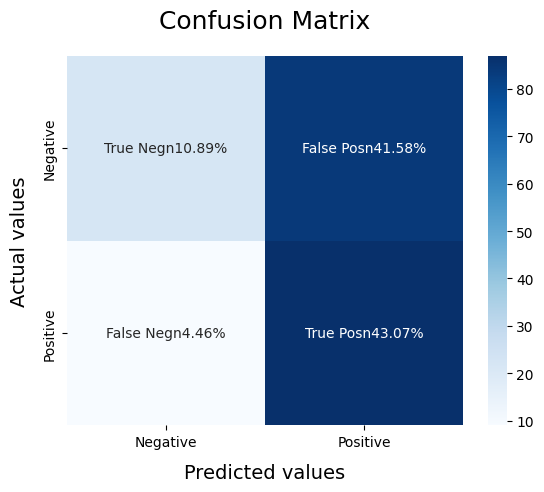

In [ ]:
# model random forest classfier
RFmodel = RandomForestClassifier(n_estimators=10)
RFmodel.fit(X_train, y_train)
model_Evaluate(RFmodel)
y_pred4 = RFmodel.predict(X_test)

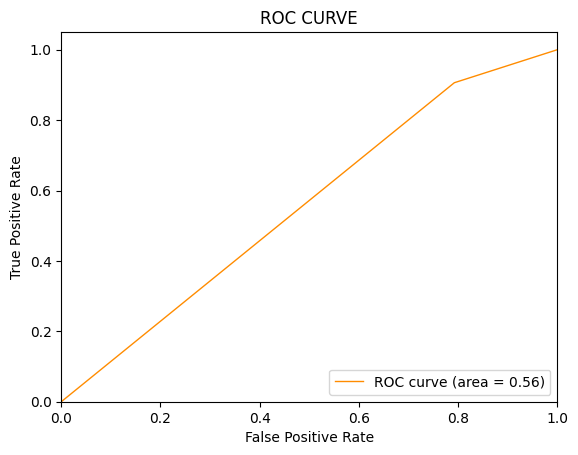

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred4)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()